## 训练模型

In [10]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# 创建实验数据
X = 2 * np.random.rand(100, 1)
y = 4 +3 * X + np.random.randn(100, 1)

In [8]:
X_b = np.c_[np.ones((100, 1)), X]
# 使用标准方程计算最佳参数
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.56742173],
       [3.22237868]])

In [12]:
X_new = np.array([0, 3])
# theta0的系数为1
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.56742173],
       [13.23455778]])

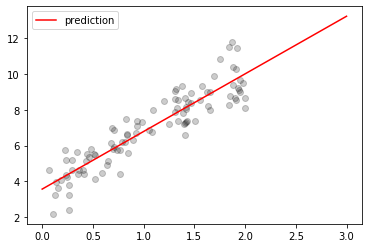

In [19]:
plt.plot(X, y, 'ok', alpha=0.2)
plt.plot(X_new, y_predict, '-r', label='prediction')
plt.axis = [0, 2, 0, 15]
plt.legend()

### 使用SGD(随机梯度下降)执行线性回归

In [26]:
from sklearn.linear_model import SGDRegressor
# 调整迭代轮数，学习率和惩罚（正则化）
sgd_reg = SGDRegressor(n_iter_no_change=200, penalty=None, eta0=0.1)
# ravel将二维数组转换为一维
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.54425005]), array([3.18875503]))

### 多项式回归
将原特征的幂次方作为新特征

In [110]:
m = 100
X = 6 * np.random.RandomState(42).rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.RandomState(42).randn(m, 1)

# 转换训练数据
from sklearn.preprocessing import PolynomialFeatures
# 创建实例
poly_features = PolynomialFeatures(degree=2, include_bias=False)
# 适配数据
X_poly = poly_features.fit_transform(X)
X_poly[0]

array([-0.75275929,  0.56664654])

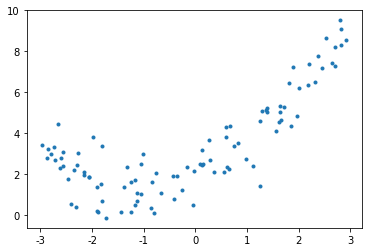

In [111]:
plt.plot(X, y, '.');

In [112]:
from sklearn.linear_model import LinearRegression

# 使用线性模型拟合转换的数据
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.96332948]), array([[1.06442082, 0.48253374]]))

如果存在多个初始特征，变换为多项式特征会极大增加特征组合，造成特征组合爆炸

### 学习曲线
是模型在训练集和验证集上，关于训练集大小的性能函数

In [113]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        train_predictions = model.predict(X_train[:m])
        train_errors.append(mean_squared_error(train_predictions, y_train[:m]))
        # 此处testsize不变化
        test_predictions = model.predict(X_test)
        val_errors.append(mean_squared_error(test_predictions, y_test))
    plt.plot(np.sqrt(train_errors), '-b', linewidth=2, label ='train')
    plt.plot(np.sqrt(val_errors), '-+r', linewidth=3, label='test')
    plt.ylim([0, 3.0])
    plt.axis
    plt.legend()

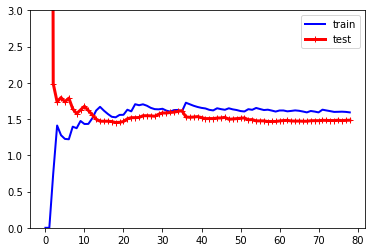

In [114]:
# 调用上方函数绘制学习曲线
np.random.seed(42)
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

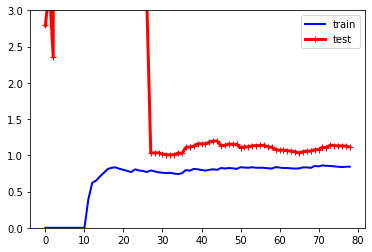

In [115]:
# 试试多项式回归
from sklearn.pipeline import Pipeline

Polynomial_regression = Pipeline([
    ('poly', PolynomialFeatures(degree=10, include_bias=False)),
    ('sgd_reg', LinearRegression())
])

plot_learning_curves(Polynomial_regression, X, y)

可以看出增加阶数有有些下降，但是仍然有写过拟合，增加训练数据的作用不大，需要改进模型

## 正则线性模型
减少过度拟合的方法，最简单的正则化方法是降低多项式的阶数

### 岭回归
一个添加了正则项的线性回归算法，添加一个正则项，从而降低所有的权重

In [118]:
from sklearn.linear_model import Ridge
# 直接是使用闭式解求解参数然后进行预测
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.9629285]])

In [122]:
# 使用随机梯度下架，设置penalty来控制惩罚项（正则化）,l2等同于岭回归
sge_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.86766806])

### 套索回归（lasso）
与岭回归的不同点是采用l1范数，倾向于完全消除掉不重要的特征的权重而非降低权重

In [124]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.91493904])

### 弹性网络
是lasso和ridge的一种择衷算法，正则项是两者的混合

In [142]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.51159373])

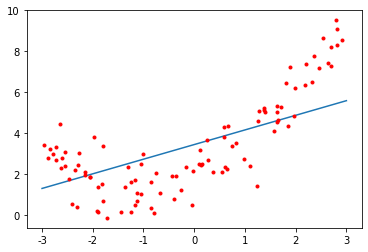

In [143]:
plt.plot([[-3], [3]], elastic_net.predict([[-3], [3]]))
plt.plot(X, y, '.r');

### 早期停止法
对于梯度下降这类算法，还可以在验证误差最小时停止训练，称为早期停止法
### 逻辑回归

In [161]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df, iris.target

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 array([0, 0, 0, 0, 0, 0,

In [181]:
from sklearn.linear_model import LogisticRegression
# 提取petal数据作为x
X = iris['data'][:, 3:]
# 使用二分类，将样本标记为种类2
y = (iris['target']==2).astype(int)
X_new = np.linspace(0, 3, num=1000).reshape(-1, 1)
log_reg = LogisticRegression()
log_reg.fit(X, y)

# 直接使用predict返回1或0，proba返回一个概率矩阵
y_proba = log_reg.predict_proba(X_new)
y_predict = log_reg.predict(X_new)

# 第一列两位判断为反例的概率，第二列为正例的概率
y_proba,y_predict

(array([[9.99250016e-01, 7.49984089e-04],
        [9.99240201e-01, 7.59799387e-04],
        [9.99230257e-01, 7.69743043e-04],
        ...,
        [3.08374822e-03, 9.96916252e-01],
        [3.04400296e-03, 9.96955997e-01],
        [3.00476842e-03, 9.96995232e-01]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

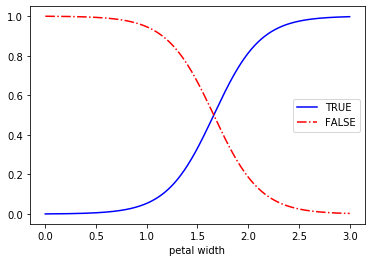

In [190]:
plt.plot(X_new, y_proba[:, 1], '-b', label='TRUE',)
plt.plot(X_new, y_proba[:, 0], '-.r', label='FALSE')
plt.xlabel('petal width')
plt.legend();

### softmax
可支持多个类别不需要训练并组合多个二元分类器

In [193]:
# 选取数据，采用两个特征，所有种类标签
X = iris['data'][:,[2,3]]
y = iris['target']
# 直接使用逻辑回归来实现softmax回归
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y);

In [195]:
softmax_reg.predict_proba([[5, 2]]), softmax_reg.predict([[5, 2]])

(array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]]), array([2]))